<a href="https://colab.research.google.com/github/JacquesBLR/Causal_Inference/blob/main/When_do_we_need_to_adjust_(python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1 - Solution

# 1. RCT or A/B Test

## 1.1 Data Simulation

In [ ]:
from numpy.random import binomial, normal, seed
from numpy import mean, unique

seed(1234)
n = 10000
treatment = binomial(1, 0.5, size=n)
outcome = binomial(1, 0.3, size=n) * treatment + binomial(1, 0.5, size=n) * (
    1 - treatment
)

## 1.2 Results

-   $P(O=1|T=1) - P(O=1|T=0)$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

-0.1810218929047634

-   adjustment(1) - adjustment(0) doesn’t apply
-   ATE = 0.3 - 0.5 = -0.2
-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

-0.1810218929047634

# 2. Adjustment formula

In [ ]:
def adjustment(t, o, z, t0):
    ind_t0 = t == t0
    z_values = unique(z)

    adjusted_prob = 0
    for z_ in z_values:
        ind_z_ = z == z_
        ind = ind_t0 & ind_z_
        adjusted_prob = adjusted_prob + mean(o[ind]) * mean(ind_z_)
    return adjusted_prob


# 3. Confounder

## 3.1 Data Simulation

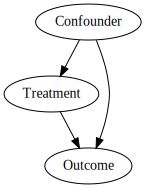

In [1]:
from graphviz import Digraph

dot = Digraph()

dot.node('T', 'Treatment')
dot.node('Y', 'Outcome')
dot.node('Z', 'Confounder')

dot.edges([('Z', 'T'), ('Z', 'Y'), ('T', 'Y')])

dot  # Affiche directement le DAG dans la cellule

In [ ]:
seed(1234)
n = 10000
confounder = binomial(1, 0.8, size=n)
treatment = binomial(1, 0.6, size=n) * confounder + binomial(1, 0.2, size=n) * (
    1 - confounder
)
outcome = (
    binomial(1, 0.3, size=n) * treatment
    + binomial(1, 0.5, size=n) * (1 - treatment)
    + confounder
    + normal(size=n)
)

## 3.2 Results

-   $P(O=1|T=1) - P(O=1|T=0)$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

0.02107032530615749

-   adjustment(1) - adjustment(0)

In [ ]:
print(adjustment(treatment, outcome, confounder, 1) - adjustment(treatment, outcome, confounder, 0))

-0.21901378090633217

-   ATE = 0.3 - 0.5 = -0.2
-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$

In [ ]:
print(adjustment(treatment, outcome, confounder, 1) - adjustment(treatment, outcome, confounder, 0))

-0.21901378090633217

# 4. Mediator

## 4.1 Data Simulation

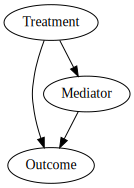

In [2]:
from graphviz import Digraph

dot = Digraph()

dot.node('T', 'Treatment')
dot.node('Y', 'Outcome')
dot.node('M', 'Mediator')

dot.edges([('T', 'M'), ('M', 'Y'), ('T', 'Y')])

dot  # Affiche directement le DAG dans la cellule

In [ ]:
seed(1234)
n = 10000

treatment = binomial(1, 0.4, size=n)
mediator = binomial(1, 0.6, size=n) * treatment + binomial(1, 0.2, size=n) * (
    1 - treatment
)
outcome = (
    binomial(1, 0.4, size=n) * treatment
    + binomial(1, 0.5, size=n) * (1 - treatment)
    + mediator
    + normal(size=n)
)

## 4.2 Results

-   $P(O=1|T=1) - P(O=1|T=0)$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

0.29470156607738807

-   adjustment(1) - adjustment(0)

In [ ]:
print(adjustment(treatment, outcome, mediator, 1) - adjustment(treatment, outcome, mediator, 0))

-0.10511006573608273

-   ATE = (0.6 + 0.4) - (0.2 + 0.5) = 0.3
-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

0.29470156607738807

# 5. Predictor

## 5.1 Data Simulation

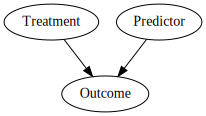

In [3]:
from graphviz import Digraph

dot = Digraph()

dot.node('T', 'Treatment')
dot.node('Y', 'Outcome')
dot.node('P', 'Predictor')

dot.edges([('P', 'Y'), ('T', 'Y')])

dot  # Affiche directement le DAG dans la cellule

In [ ]:
seed(1234)
n = 10000

treatment = binomial(1, 0.4, size=n)
predictor = binomial(1, 0.4, size=n)
outcome = (
    binomial(1, 0.4, size=n) * treatment
    + binomial(1, 0.5, size=n) * (1 - treatment)
    + predictor
    + normal(size=n)
)

## 5.2 Results

-   $P(O=1|T=1) - P(O=1|T=0)$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

-0.07386507504710504

-   adjustment(1) - adjustment(0)

In [ ]:
print(adjustment(treatment, outcome, predictor, 1) - adjustment(treatment, outcome, predictor, 0))

-0.08193645550537232

-   ATE = 0.4 - 0.5 = -0.1

$\hat{ATE}$ has two unbiased estimators

-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

-0.07386507504710504

-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$

In [ ]:
print(adjustment(treatment, outcome, predictor, 1) - adjustment(treatment, outcome, predictor, 0))

-0.08193645550537232

# 6. Unobserved Confounder

## 6.1 Data Simulation

In [ ]:
seed(1234)
n = 10000
confounder = binomial(1, 0.8, size=n)
treatment = binomial(1, 0.6, size=n) * confounder + binomial(1, 0.2, size=n) * (
    1 - confounder
)
outcome = (
    binomial(1, 0.3, size=n) * treatment
    + binomial(1, 0.5, size=n) * (1 - treatment)
    + confounder
    + normal(size=n)
)

## 6.2 Results

-   $P(O=1|T=1) - P(O=1|T=0)$

In [ ]:
print(mean(outcome[treatment==1]) - mean(outcome[treatment==0]))

0.02107032530615749

-   adjustment(1) - adjustment(0) cannot be calculated
-   ATE = -0.2
-   $\hat{ATE} = P(O=1|do(T=1)) - P(O=1|do(T=0))$ cannot be calculated

# 7. Part II

$P^{do(C:=2)}(E) = P(E|C=2) \sim N(2, 1)$

$P^{do(E:=2)}(C) \sim N(0, 1) ≠ P(C|E=2) = P(N1| N1+N2=2) \sim N(1, (1/2)1/2)$